In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

""" Load data """

train = pd.read_csv('./data/train.csv')


# Examine data format

In [69]:
""" Examine data format """
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualizations

## Sex and Class vs. Survival Rate

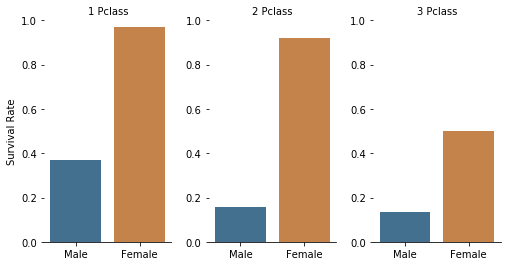

In [90]:
g = sns.factorplot(
    x="Sex", y="Survived", col="Pclass",
    data=train,
    saturation=.5, kind="bar", ci=None, aspect=.6
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

plt.show(g)

# Data cleanup

In [91]:
unusable_column_names = ['Name', 'Ticket', 'Cabin', 'Embarked']


def clean(data):
    return pd.DataFrame(dict(
        passenger_id=data.PassengerId,
        sex=data.Sex.map(lambda s: 1 if s == 'male' else 0),
        pclass=data.Pclass,
        fare=data.Fare / max(data.Fare),
        age=data.Age,
    ))

train_cleaned = clean(train)
train_cleaned = train_cleaned.assign(did_survive=train.Survived)

## Train - Cleaned

In [92]:
display(train_cleaned.head())

,age,fare,passenger_id,pclass,sex,did_survive
0,22.0,0.014151,1,3,1,0
1,38.0,0.139136,2,1,0,1
2,26.0,0.015469,3,3,0,1
3,35.0,0.103644,4,1,0,1
4,35.0,0.015713,5,3,1,0


# Predictive models

In [93]:
from sklearn.model_selection import train_test_split


def get_selected_features(data):
    return np.asarray([
        data.sex,
        data.pclass,
        data.fare,
    ]).T

selected_features = get_selected_features(train_cleaned)
labels = train_cleaned.did_survive

X = np.asarray(selected_features)

y = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

## KNN

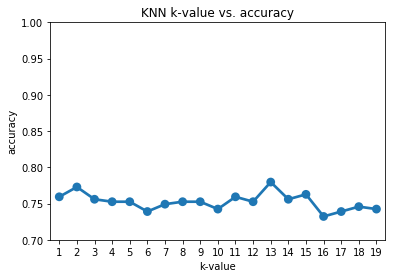

kNN performs best at k=13.
Score: 77.97%


In [94]:
from sklearn.neighbors import KNeighborsClassifier

n_values = list(range(1, 20))
ks_and_scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    ks_and_scores.append((k, score))

g = sns.pointplot(
    x=[k_and_score[0] for k_and_score in ks_and_scores],
    y=[k_and_score[1] for k_and_score in ks_and_scores],
)
g.set_ylim(0.7, 1)
g.set_title('KNN k-value vs. accuracy')
g.set_xlabel('k-value')
g.set_ylabel('accuracy')

plt.show(g)

best_k_value = max(ks_and_scores, key=lambda k_and_score: k_and_score[1])[0]
print(f"kNN performs best at k={best_k_value}.")

knn = KNeighborsClassifier(n_neighbors=best_k_value)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f"Score: {score * 100:0.2f}%")

# Predictions on test data

Using the knn model with k=4, we generate the highest scores.

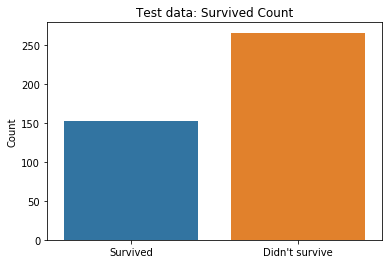

In [89]:
test = pd.read_csv('./data/test.csv')

test_cleaned = clean(test)

selected_test_features = get_selected_features(test_cleaned)

predictions = pd.DataFrame({
    'PassengerId': test_cleaned.passenger_id,
    'Survived': knn.predict(selected_test_features)
})

g = sns.barplot(
    x=['Survived', 'Didn\'t survive'],
    y=[
        len([True for s in predictions.Survived if s == 1.0]),
        len([False for s in predictions.Survived if s == 0.0]),
    ]
)
g.set_ylabel('Count')
g.set_title('Test data: Survived Count')
plt.show(g)

predictions.to_csv('./results/titanic.csv', index=False)